<a href="https://colab.research.google.com/github/Khaled97Otour/Leukemia-Classification/blob/main/Leukemia_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


{"username":"khaledotour","key":"e50ff4ec7d2365ce86c496b1b02e54a5"}

In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/andrewmvd/leukemia-classification")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: khaledotour
Your Kaggle Key: ··········


100%|██████████| 867M/867M [00:10<00:00, 88.1MB/s]


Acute lymphoblastic leukemia (ALL) is the most common type of childhood cancer and accounts for approximately 25% of the pediatric cancers.

These cells have been segmented from microscopic images and are representative of images in the real-world because they contain some staining noise and illumination errors, although these errors have largely been fixed in the course of acquisition.

The task of identifying immature leukemic blasts from normal cells under the microscope is challenging due to morphological similarity and thus the ground truth labels were annotated by an expert oncologist.

In total there are 15,135 images from 118 patients with two labelled classes:

1. Normal cell.
1. Leukemia blast.

In [5]:
import pandas as pd 
import os 
import glob
import numpy as np
import cv2 
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf 
import keras 
from keras import Model
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, BatchNormalization,MaxPool2D, GlobalMaxPool2D,MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Input, ReLU, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


--2022-10-13 13:20:25--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.1.208, 172.253.115.128, 172.253.122.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.1.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   239MB/s    in 0.4s    

2022-10-13 13:20:26 (239 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [6]:
# reading the path and put them in a diffrent list 
 
train_dataset_0_all = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/all/*.bmp")
train_dataset_0_hem = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/training_data/fold_0/hem/*.bmp")
train_dataset_1_all = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/all/*.bmp")
train_dataset_1_hem = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/training_data/fold_1/hem/*.bmp")
train_dataset_2_all = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/all/*.bmp")
train_dataset_2_hem = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/training_data/fold_2/hem/*.bmp")

In [7]:
train_dataset_all = []
train_dataset_hem = []
train_dataset     = []

train_dataset_all.extend(train_dataset_0_all)
train_dataset_all.extend(train_dataset_1_all)
train_dataset_all.extend(train_dataset_2_all)

train_dataset_hem.extend(train_dataset_0_hem)
train_dataset_hem.extend(train_dataset_1_hem)
train_dataset_hem.extend(train_dataset_2_hem)


train_dataset.extend(train_dataset_all)
train_dataset.extend(train_dataset_hem)
train_dataset = np.asarray(train_dataset)

train_dataset_all = np.asarray(train_dataset_all)
train_dataset_hem = np.asarray(train_dataset_hem)

print("the shape of the all training data is {} and the hem data is {}".format(train_dataset_all.shape[0],train_dataset_hem.shape[0]))


the shape of the all training data is 7272 and the hem data is 3389


## After building the pattren and gather them in two arrays the following must be done:

1. create a series to build my data fram 
2. label the pattren 
3. read the images and preprocesse them 

In [8]:
def Label (x,y):
  label = []
  for i in range(len(x)):
    label.append(1)
  for j in range(len(y)):
    label.append(0)
  label = np.asarray(label)
  return label

In [9]:
label = Label(train_dataset_all,train_dataset_hem) 
print(label.shape[0])

10661


In [10]:
def do_dataset (x,y):
  data= pd.DataFrame(x,columns=["Image Pattren"])
  data["label"]=y
  return data

In [11]:
dataset = do_dataset(train_dataset,label)
dataset

,Image Pattren,label
0,/content/leukemia-classification/C-NMC_Leukemi...,1
1,/content/leukemia-classification/C-NMC_Leukemi...,1
2,/content/leukemia-classification/C-NMC_Leukemi...,1
3,/content/leukemia-classification/C-NMC_Leukemi...,1
4,/content/leukemia-classification/C-NMC_Leukemi...,1
...,...,...
10656,/content/leukemia-classification/C-NMC_Leukemi...,0
10657,/content/leukemia-classification/C-NMC_Leukemi...,0
10658,/content/leukemia-classification/C-NMC_Leukemi...,0
10659,/content/leukemia-classification/C-NMC_Leukemi...,0


In [12]:
def Image_Preprocessing (x):
  image =[]

  for i in x:
    a = cv2.imread(i)
    a = cv2.resize(a,(100,100))
    a = a.astype('uint8')
    a=a/255
    image.append(a)
  image = np.asarray(image)
  return(image)

In [13]:
Image = Image_Preprocessing(dataset["Image Pattren"])

In [14]:
print('The number of Images are {} and each on of them has {} size'.format(Image.shape[0],Image[0].shape))

The number of Images are 10661 and each on of them has (100, 100, 3) size


In [15]:
Image, label = shuffle(Image, label, random_state = 42)

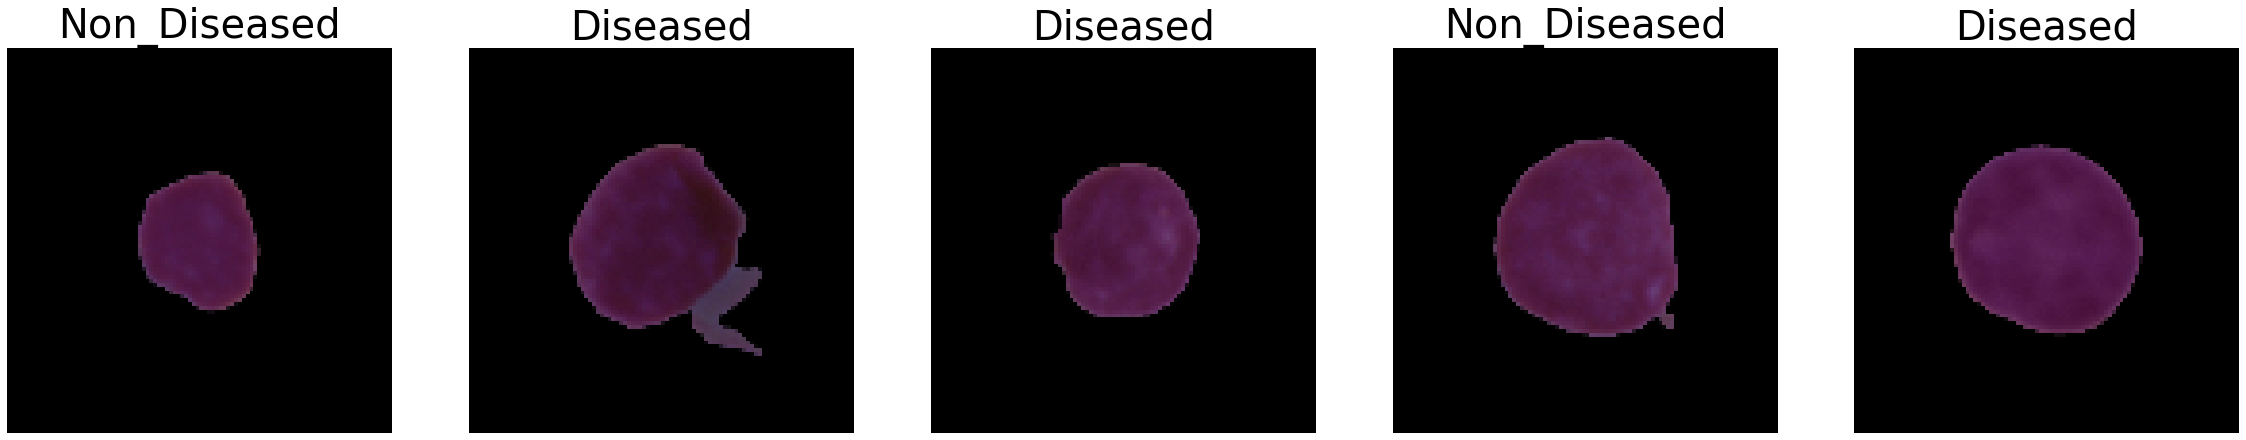

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (40,40))

for i in range(5):
    rand = np.random.randint(len(Image))
    ax[i].imshow(Image[rand])
    ax[i].axis('off')
    a = label[rand]
    if a == 1:
        ax[i].set_title('Diseased', fontsize=40)
    else:
        ax[i].set_title('Non_Diseased', fontsize=40)

In [17]:
validation_data = pd.read_csv("/content/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data_labels.csv")
validation_data_pattren = glob.glob("/content/leukemia-classification/C-NMC_Leukemia/validation_data/C-NMC_test_prelim_phase_data/*.bmp")
validation_data['new_names'] = validation_data_pattren
validation_data

,Patient_ID,new_names,labels
0,UID_57_29_1_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1
1,UID_57_22_2_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1
2,UID_57_31_3_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1
3,UID_H49_35_1_hem.bmp,/content/leukemia-classification/C-NMC_Leukemi...,0
4,UID_58_6_13_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1
...,...,...,...
1862,UID_54_33_1_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1
1863,UID_55_24_1_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1
1864,UID_H32_20_1_hem.bmp,/content/leukemia-classification/C-NMC_Leukemi...,0
1865,UID_54_30_2_all.bmp,/content/leukemia-classification/C-NMC_Leukemi...,1


In [18]:
Image_validation = Image_Preprocessing(validation_data['new_names'])

In [19]:
labels_validation = validation_data['labels']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(Image, label, test_size=0.33)

In [21]:
def CNN(input_shape):  
  model = Sequential()

  model.add(Conv2D(64,(3,3),input_shape=(100,100,3),padding="same",activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(64,(3,3),padding="same",activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(128,(3,3),padding="same",activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(128,(3,3),padding="same",activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Conv2D(256,(3,3),padding="same",activation='relu'))
  model.add(MaxPooling2D(2,2))

  model.add(Flatten())
  
  model.add(Dense(512,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(256,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(128,activation='relu'))
  model.add(Dropout(0.5))

  model.add(Dense(1,activation='sigmoid'))

  return model

In [22]:
input_shape = (100,100,3)

model = CNN(input_shape)

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [24]:
optimizer = Adam()
model.compile(
    optimizer,
    'binary_crossentropy',
    metrics=['accuracy']
)
# Defining Callbacks
ACCURACY_THRESHOLD = 0.92
LOSS_THRESHOLD = 0.20
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('accuracy') >= ACCURACY_THRESHOLD and logs.get('loss') <= LOSS_THRESHOLD :
      print("\nReached {} accuracy and {} loss , so stopping training!!".format(ACCURACY_THRESHOLD*100,LOSS_THRESHOLD*100)) 
      self.model.stop_training = True
callback = MyCallback()

In [25]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

In [26]:
history=model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    validation_data =datagen.flow(X_test, y_test, batch_size=64),
    verbose=1,
    epochs=500,
    callbacks = callback
)

Epoch 1/500
112/112 [==============================] - 34s 226ms/step - loss: 0.5837 - accuracy: 0.6955 - val_loss: 0.4989 - val_accuracy: 0.7889
Epoch 2/500
112/112 [==============================] - 24s 218ms/step - loss: 0.4912 - accuracy: 0.7882 - val_loss: 0.4551 - val_accuracy: 0.7906
Epoch 3/500
112/112 [==============================] - 24s 218ms/step - loss: 0.4682 - accuracy: 0.8008 - val_loss: 0.4389 - val_accuracy: 0.7897
Epoch 4/500
112/112 [==============================] - 24s 218ms/step - loss: 0.4548 - accuracy: 0.8094 - val_loss: 0.4155 - val_accuracy: 0.8309
Epoch 5/500
112/112 [==============================] - 24s 217ms/step - loss: 0.4480 - accuracy: 0.8131 - val_loss: 0.3885 - val_accuracy: 0.8429
Epoch 6/500
112/112 [==============================] - 28s 250ms/step - loss: 0.4329 - accuracy: 0.8206 - val_loss: 0.3930 - val_accuracy: 0.8400
Epoch 7/500
112/112 [==============================] - 33s 296ms/step - loss: 0.4237 - accuracy: 0.8250 - val_loss: 0.3641 -

In [27]:
model.evaluate(Image_validation,labels_validation)

59/59 [==============================] - 1s 13ms/step - loss: 2.8631 - accuracy: 0.3471


[2.8630712032318115, 0.34708088636398315]

Text(0.5, 0, 'epoch')

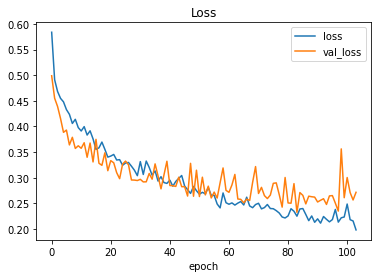

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

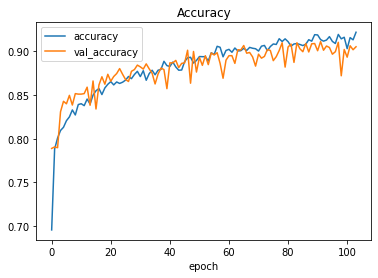

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy','val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [30]:
import json

# lets assume `model` is main model 
model_json = model.to_json()
with open("model_in_json_Leukemia_Classification.json", "w") as json_file:
    json.dump(model_json, json_file)

model.save_weights("Leukemia_Classification.h5")

In [31]:
from google.colab import files
uploaded = files.upload()
for k, v in uploaded.items():
    open(k, 'wb').write(v)
Image = cv2.imread(k)
Image = cv2.resize(Image,(100,100))
Image = Image.astype('uint8')
Image = Image/255
Image = np.expand_dims(Image,axis=0)
predict = model.predict(Image)
if predict > 0.5:
  print("the cells have ALL with {} model precentage in prediction".format(predict))
else: 
  print("the cells are normal with {} model precentage in prediction".format(predict))

Saving download (1).jpg to download (1).jpg
1/1 [==============================] - 0s 229ms/step
the cells are normal with [[0.03469405]] model precentage in prediction
